<a href="https://colab.research.google.com/github/JeroDeNero/CAP4630/blob/master/CAP4630HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1


Setting up the 3D Space

In [0]:
#imports
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#setting up 3D space
x = np.linspace(-20, 20, 1000)
y = np.linspace(-20, 20, 1000)
X, Y = np.meshgrid(x, y)
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

$f_1 = (x-5)^2$
>Where $p_1$ is a minimum: $p_1 = (5,0,0)$

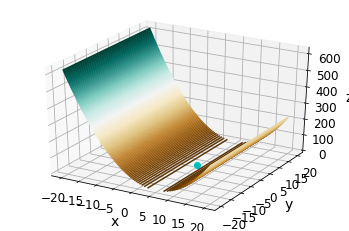

In [123]:
f1 = lambda x,y: (x-5)**2

Z1 = f1(X,Y)

#setting up axis label
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z1, 150, cmap='BrBG')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

p1 = [[5],
      [0],
      [0]]
ax.plot(p1[0], p1[1],p1[2],'co')

$f_2 = -(x-7)^2 + 5$
>Where $p_2$ is a maximum: $p_2 = (7,5,0)$

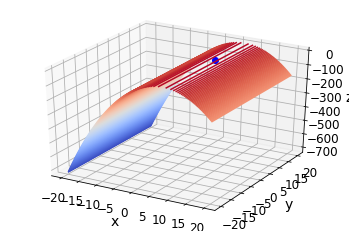

In [105]:
f2 = lambda x,y: -(x-7)**2 + 5

Z2 = f2(X,Y)

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z2, 200, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

p2 = [[7],
      [5],
      [0]]
ax.plot(p2[0], p2[1],p2[2],'bo')

$f_3 = x^3$
>Where $p_3$ is neither a minimum or maximum: $p_3 = (0,0,0)$

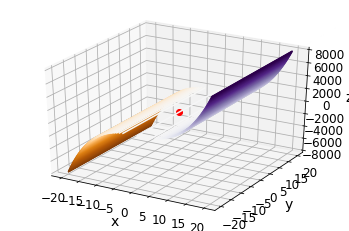

In [106]:
f3 = lambda x,y: x**3

Z3 = f3(X,Y)

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z3, 300, cmap='PuOr')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

p3 = [[0],
      [0],
      [0]]
ax.plot(p3[0], p3[1],p3[2],'ro')

##Problem 2

**Imports**

In [0]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

**Generating Random Data**

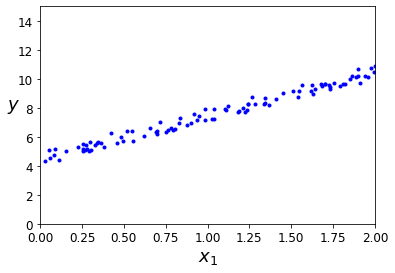

In [199]:
#generating m random pairs
m = 100
x = 2 * np.random.rand(m,1)
y = 4 + 3 * x + np.random.rand(m,1)

plt.plot(x,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [200]:
#showing first 5 rows
print(x[:5,:])

[[0.61905523]
 [1.62759004]
 [1.36946235]
 [0.32523388]
 [1.82185437]]


**Combining bias $b = w_0$ and weight $w_1$**

In [206]:
#add x0 = 1
x_b = np.column_stack([np.ones((m,2)), x])
print(x_b.shape)
#showing the first 5 rows
print(x_b[:5,:])
#create array with x1 = 0 and x1 = 2
x_new = np.array([[0],[2]])
#add x0 = 1 to each instance
x_new_b = np.column_stack([np.ones((2,2)),x_new])
print(x_new_b) 

(100, 3)
[[1.         1.         0.61905523]
 [1.         1.         1.62759004]
 [1.         1.         1.36946235]
 [1.         1.         0.32523388]
 [1.         1.         1.82185437]]
[[1. 1. 0.]
 [1. 1. 2.]]


In [207]:
#number of epochs
epochs = 20
#learning rate
lr = 0.01
#fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3,1)

weight = initial_weight

print(initial_weight.shape)
print(y.shape)
print((x_b.dot(initial_weight)).shape)
print((x_b.T.dot(x_b.dot(initial_weight))).shape)

(3, 1)
(100, 1)
(100, 1)
(3, 1)


In [208]:
for epoch in range(epochs):
  gradient = 1/m * x_b.T.dot(x_b.dot(weight) - y)
  weight = weight - lr * gradient

y_predict = x_new_b.dot(weight)
y_predict

array([[2.30317809],
       [5.85986992]])

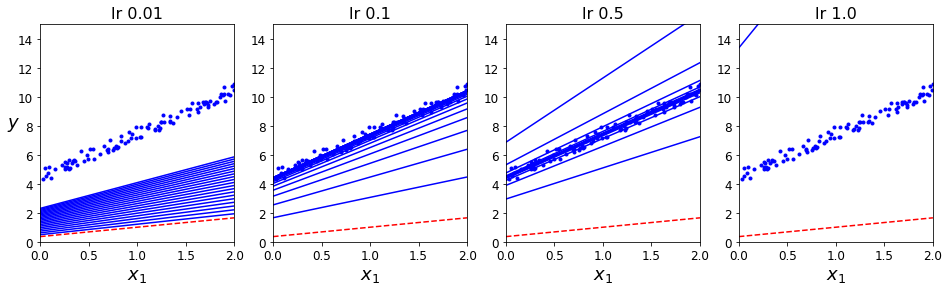

array([[2.52975087],
       [1.89477242],
       [3.00403383]])

In [209]:
def plot_gradient_descent(weight, lr, weight_path=None):
  #plot training data
  plt.plot(x,y,"b.")
  #plot initial prediction
  y_predict = x_new_b.dot(weight)
  plt.plot(x_new, y_predict,"r--")

  if weight_path is not None:
    weight_path.append(weight)
  
  for epoch in range(epochs):
    gradient = 1/m*x_b.T.dot(x_b.dot(weight) - y)
    weight = weight - lr * gradient
    if weight_path is not None:
      weight_path.append(weight)
    #plot prediction after weight update
    y_predict = x_new_b.dot(weight)
    plt.plot(x_new, y_predict, "b-")
  
  plt.xlabel("$x_1$", fontsize=18)
  plt.axis([0,2,0,15])
  plt.title("lr {}".format(lr), fontsize=16)

weight_path_bgd = []

plt.figure(figsize=(16,4))
plt.subplot(141)
plt.ylabel("$y$", rotation=0, fontsize=18)
plot_gradient_descent(initial_weight, 0.01)

plt.subplot(142)
plot_gradient_descent(initial_weight, 0.1, weight_path_bgd)

plt.subplot(143)
plot_gradient_descent(initial_weight, 0.5)

plt.subplot(144)
plot_gradient_descent(initial_weight, 1.0)

plt.show()

weight_path_bgd[-1]

##Problem 3

Loading the MNIST digits data

**Importing**

In [0]:
#Importing the Packages and Data
import time
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**Computing Average MNIST Digits**

In [224]:
#obtaining the amount of images in train images
num = len(train_images)
#create a start variable to time each epoch
start = time.time()

#setting each pixel in the picture to 0
average_digits = np.zeros((10,28,28))
#setting each picture value to 0
freq_digits = np.zeros((10,1,1))

for idx in np.arange(num):
  label = train_labels[idx]
  average_digits[label] += train_images[idx]
  freq_digits += 1

average_digits /= freq_digits
end = time.time()

#time for the epoch
print(end-start)

0.38233447074890137


**Displaying the Images**

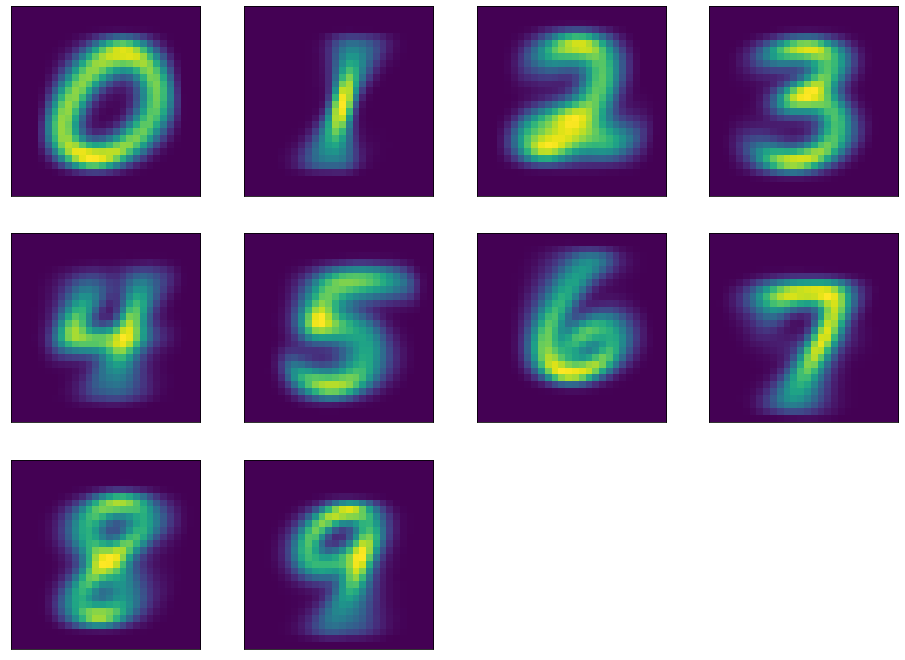

In [230]:
def display_average_digits():
  plt.figure(figsize=(16,16))
  
  for label in np.arange(10):
    plt.subplot(4,4,1 + label)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(average_digits[label])

  plt.show()

display_average_digits()